In [1]:
import numpy as np
import sys
sys.path.append('../wofs_phi')
import config as c
import utilities
from sklearn.metrics import brier_score_loss as BS
import os
from shutil import copy
import matplotlib.pyplot as plt
import math
import pandas as pd
import matplotlib.ticker as ticker

In [2]:
test = pd.read_csv('/work/ryan.martz/wofs_phi_data/experiments/wofs_psv3_with_torp_trained/obs/length_60/tree_interpreter/hail/sampled_aggregate_ti_data_wofs_psv3_with_torp_hail_obs_trained_30-90min_r15km.csv')


In [3]:
test

,Unnamed: 0,ws_80,dbz_1km,wz_0to2_instant,uh_0to2_instant,uh_2to5,w_up,w_1km,10-500m_bulkshear,fed,...,reflectivity_min_min_45km,reflectivity_min_min_60km,extrapolation_minutes,extrapolation_minutes_min_15km,extrapolation_minutes_min_30km,extrapolation_minutes_min_45km,extrapolation_minutes_min_60km,obs,probs,bias
0,0,-2.944507e-07,-8.936231e-08,0.000000e+00,4.887931e-08,2.341957e-07,0.000000e+00,-1.006093e-08,-7.810841e-07,-1.640088e-07,...,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,1.543140e-05,0.001380
1,1,-2.944507e-07,0.000000e+00,0.000000e+00,4.887931e-08,1.136962e-08,0.000000e+00,-1.006093e-08,-5.788040e-07,-1.143187e-07,...,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,9.296445e-08,0.001380
2,2,-1.628646e-05,-4.594798e-06,-8.682851e-06,0.000000e+00,1.644126e-04,-1.250930e-04,1.619965e-04,-1.913801e-04,-1.873844e-04,...,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,3.497333e-03,0.001380
3,3,0.000000e+00,0.000000e+00,0.000000e+00,1.261089e-08,-1.051989e-08,-2.629258e-08,1.783612e-08,-4.148882e-07,-2.101867e-07,...,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,1.346678e-07,0.001380
4,4,-1.936692e-06,0.000000e+00,-4.236265e-07,1.163448e-04,-1.807822e-05,1.329467e-04,0.000000e+00,-9.809816e-05,1.429893e-05,...,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,7.919237e-03,0.001380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12536995,12536995,-1.530280e-06,-2.349142e-07,-5.386871e-06,-3.857904e-05,-1.435310e-07,-8.988239e-05,-8.682247e-06,1.354809e-05,-6.246206e-06,...,0.0,0.0,-9.099107e-07,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,7.646354e-05,0.001925
12536996,12536996,1.120693e-07,1.040473e-06,0.000000e+00,-2.615583e-06,-1.054659e-07,-1.054381e-05,-4.684919e-07,-1.324332e-06,-6.080501e-07,...,0.0,0.0,0.000000e+00,0.000000e+00,-2.212423e-05,0.0,-2.841897e-07,0.0,5.779018e-05,0.001925
12536997,12536997,-1.896361e-07,0.000000e+00,0.000000e+00,-8.512667e-08,-1.054659e-07,4.911481e-07,1.547880e-06,-1.535905e-06,-1.120509e-07,...,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,1.209982e-06,0.001925
12536998,12536998,-8.644960e-07,0.000000e+00,0.000000e+00,-1.475126e-07,-2.985086e-08,-8.083262e-07,-8.713861e-08,-2.225566e-06,6.306082e-07,...,0.0,0.0,-7.417501e-08,-9.848290e-09,-1.620794e-07,0.0,-8.495455e-07,0.0,3.979602e-05,0.001925


In [2]:
def get_avg_srs(train_type, model_type, hazard, forecast_length, radius, lead):
    
    avg_srs_dir = '/work/ryan.martz/wofs_phi_data/%s_train/test_fcsts/%s/%s/wofslag_25/length_%s'\
    %(train_type, model_type, hazard, forecast_length)
    
    avg_srs_file = '%s_%s_r%skm_trained_all_%s_avg_sr_probs_%s-%smin.npy'\
    %(model_type, train_type, radius, hazard, lead, lead + forecast_length)
    
    return avg_srs_dir, avg_srs_file

In [3]:
def get_raw_probs(train_type, model_type, hazard, forecast_length, radius, lead):
    
    raw_probs_dir = '/work/ryan.martz/wofs_phi_data/%s_train/test_fcsts/%s/%s/wofslag_25/length_%s'\
    %(train_type, model_type, hazard, forecast_length)
    
    raw_probs_file = '%s_%s_r%skm_trained_all_%s_test_raw_probs_%s-%smin.npy'\
    %(model_type, train_type, radius, hazard, lead, lead + forecast_length)
    
    return raw_probs_dir, raw_probs_file

In [4]:
def get_labels(label_type, model_type, hazard, forecast_length, lead, radius):
    
    label_dir = '/work/ryan.martz/wofs_phi_data/%s_train/test_fcsts/%s/%s/wofslag_25/length_%s'\
    %(label_type, model_type, hazard, forecast_length)
    
    label_file = 'all_%s_%s_%s-%smin_r%skm.npy'\
    %(hazard, label_type, lead, lead + forecast_length, radius)
    
    return label_dir, label_file

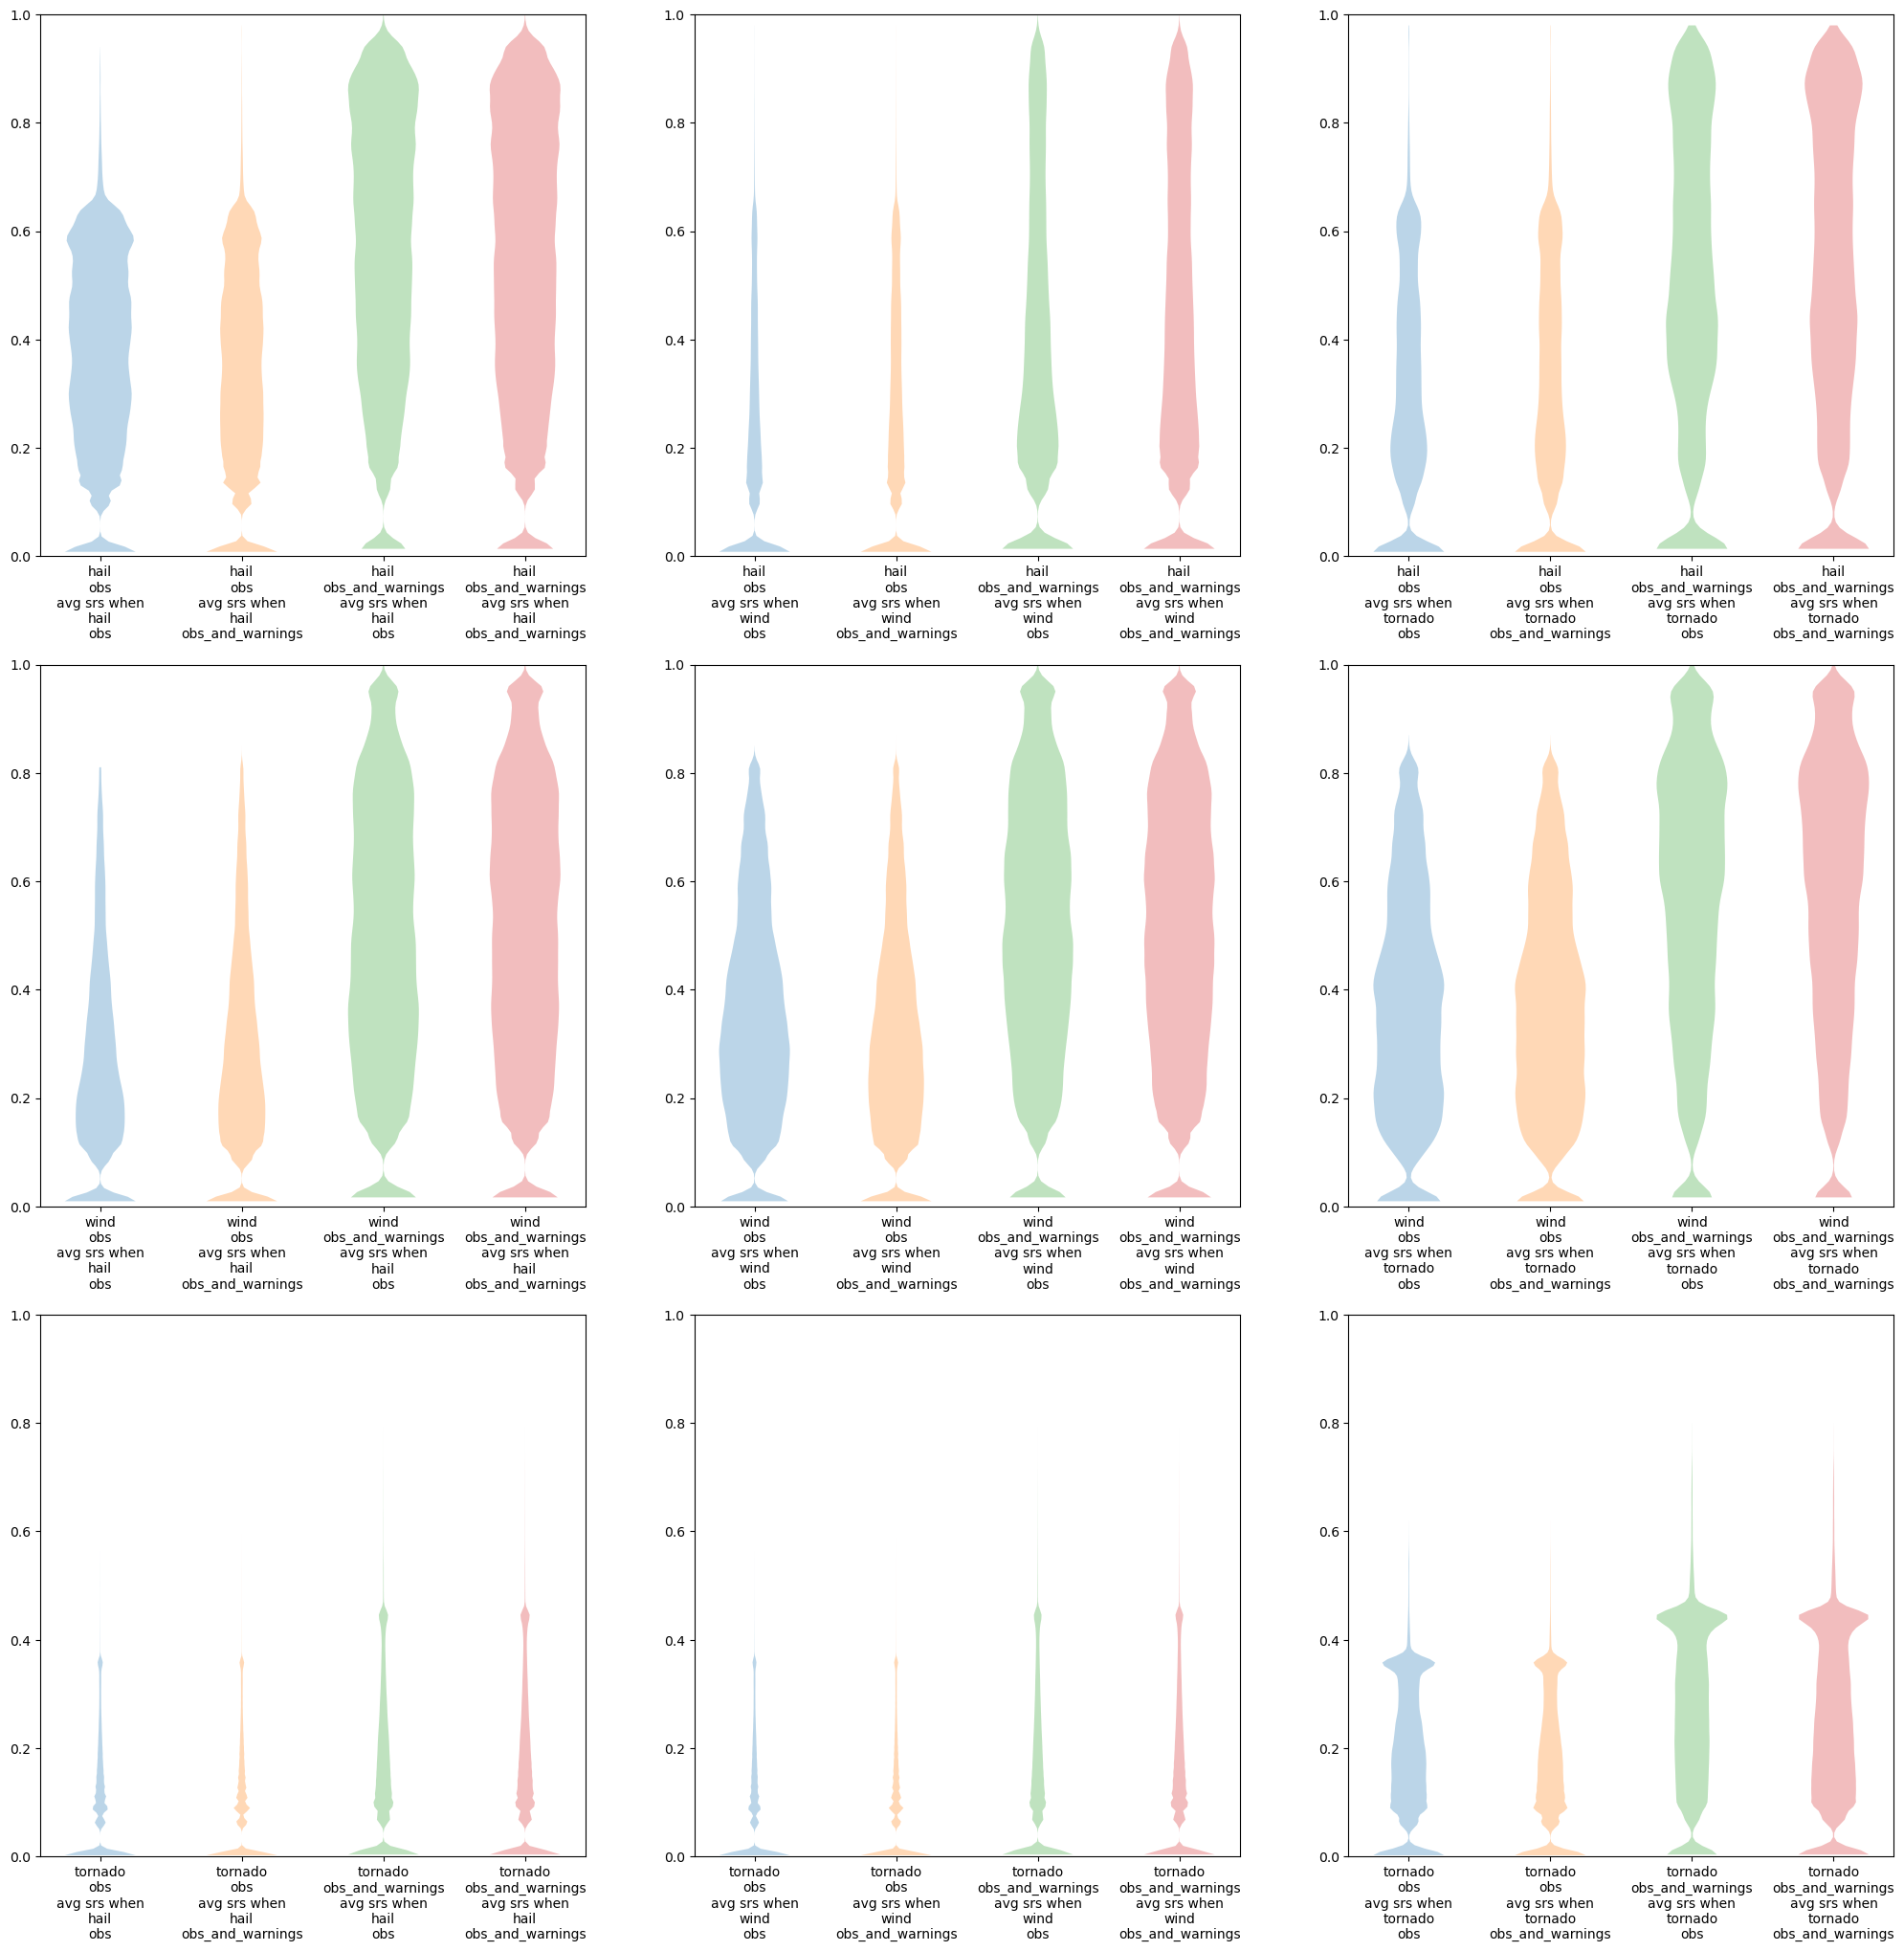

In [68]:
model_type = 'wofs_psv3_no_torp'
forecast_length = 60
lead = 30
radius = 39
hazards = ['hail', 'wind', 'tornado']
train_types = ['obs', 'obs_and_warnings']

fig, ax = plt.subplots(3,3)
fig.set_size_inches(25, 25)

for i in range(len(hazards)):
    train_haz = hazards[i]
    for j in range(len(hazards)):
        label_haz = hazards[j]
        #need obs/obs, obs/obs+warnings, obs+warnings/obs, obs+warnings/obs+warnings
        xticks = []
        xticklabels = []
        k = 0
        for train_type in train_types:
            for label_type in train_types:
                prob_dir, probs_file = get_avg_srs(train_type, model_type, train_haz,\
                                                   forecast_length, radius, lead)
                label_dir, label_file = get_labels(label_type, model_type, label_haz,\
                                                   forecast_length, lead, radius)
                
                probs = np.load('%s/%s' %(prob_dir, probs_file))
                labels = np.load('%s/%s' %(label_dir, label_file))
                
                haz_probs_when_yes = probs[labels == 1]
                haz_probs_when_no = probs[labels == 0]
                
                ax[i,j].violinplot(haz_probs_when_yes, [k], showextrema=False)
                xticklabels.append('%s\n%s\navg srs when\n%s\n%s' %(train_haz, train_type, label_haz, label_type))
                xticks.append(k)
                k += 1
        
        ax[i,j].set_xticks(xticks)
        ax[i,j].set_xticklabels(xticklabels)
        ax[i,j].set_ylim([0,1])

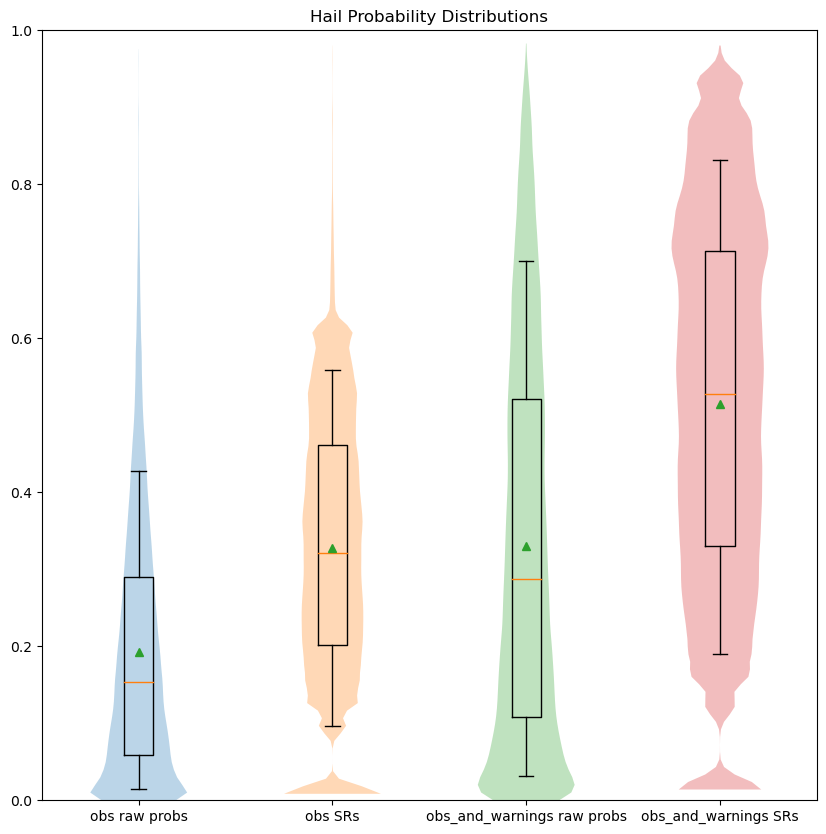

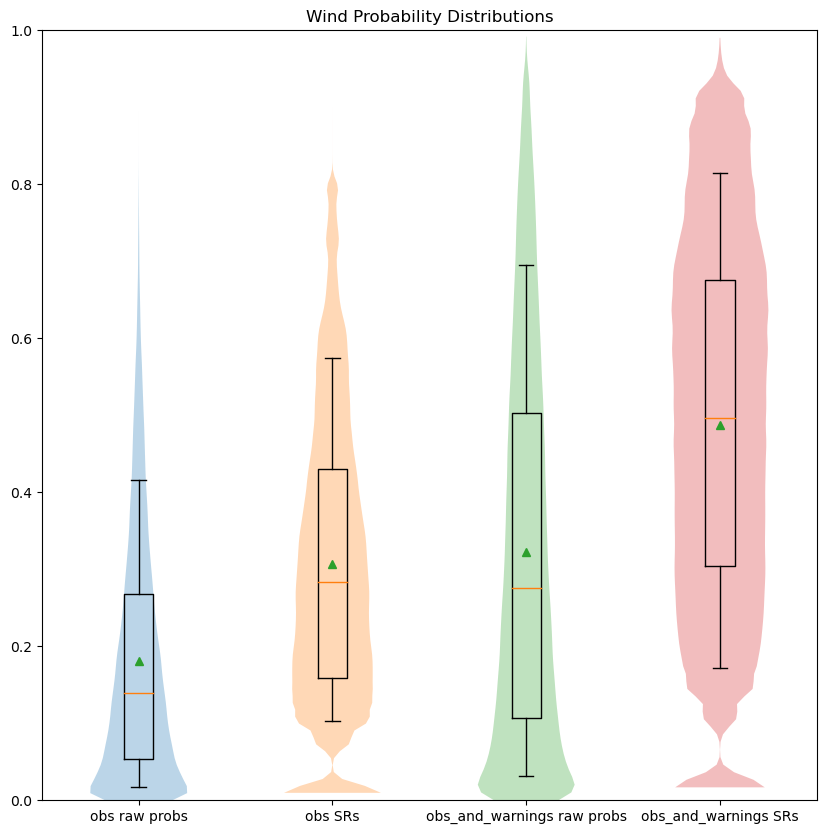

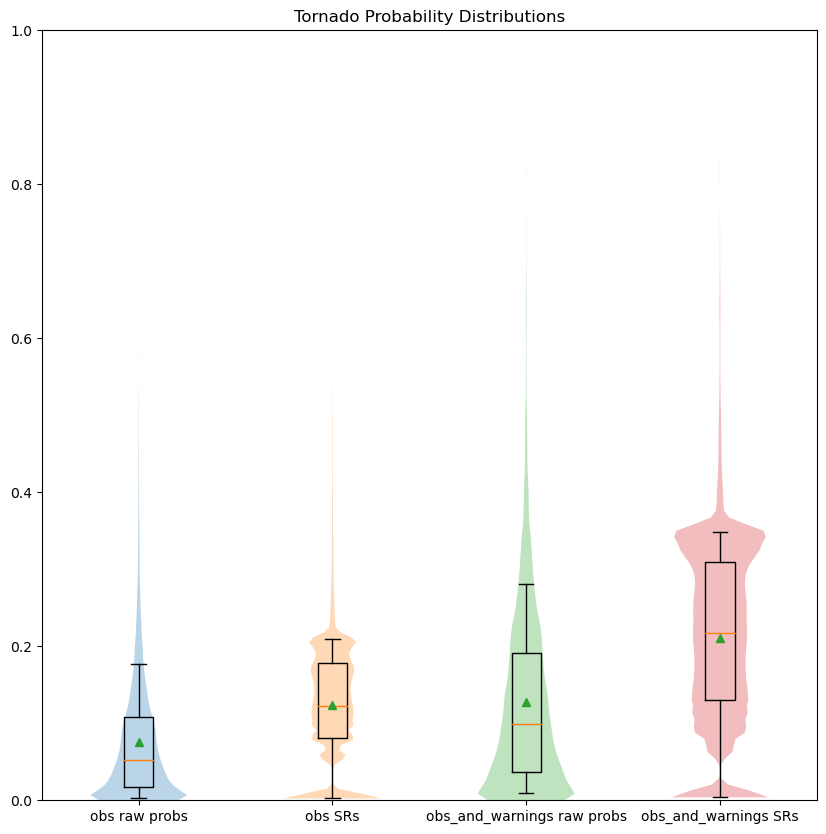

In [24]:
model_type = 'wofs_psv2_no_torp'
forecast_length = 60
lead = 30
radius = 39
hazards = ['hail', 'wind', 'tornado']
train_types = ['obs', 'obs_and_warnings']
label_type = 'obs_and_warnings'

#fig, ax = plt.subplots(1,3)
#fig.set_size_inches(30, 10)

for i in range(len(hazards)):
    haz = hazards[i]
    #need obs/obs+warnings raw, obs/obs+warnings with SRs, obs+warnings/obs+warnings raw, obs+warnings/obs+warnings with SRs
    xticks = []
    xticklabels = []
    k = 0
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 10)
    for train_type in train_types:
        
        sr_dir, sr_file = get_avg_srs(train_type, model_type, haz,\
                                           forecast_length, radius, lead)
        prob_dir, prob_file = get_raw_probs(train_type, model_type, haz,\
                                           forecast_length, radius, lead)
        label_dir, label_file = get_labels(label_type, model_type, haz,\
                                           forecast_length, lead, radius)
        
        srs = np.load('%s/%s' %(sr_dir, sr_file))
        probs = np.load('%s/%s' %(prob_dir, prob_file))
        labels = np.load('%s/%s' %(label_dir, label_file))
        
        haz_probs_when_yes = probs[labels == 1]
        haz_srs_when_yes = srs[labels == 1]
        
        ax.violinplot(haz_probs_when_yes, [k], showextrema=False)
        ax.boxplot(haz_probs_when_yes, positions = [k], showmeans = True, showfliers = False, whis = [10, 90])
        xticklabels.append('%s raw probs' %(train_type))
        xticks.append(k)
        k += 1
        
        ax.violinplot(haz_srs_when_yes, [k], showextrema=False)
        ax.boxplot(haz_srs_when_yes, positions = [k], showmeans = True, showfliers= False, whis = [10, 90])
        xticklabels.append('%s SRs' %(train_type))
        xticks.append(k)
        k += 1
        
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)
    ax.set_ylim([0,1])
    ax.set_title('%s Probability Distributions' %(haz.capitalize()))
    

In [31]:
test = pd.read_csv('/work/ryan.martz/wofs_phi_data/experiments/wofs_psv3_no_torp_trained/obs/length_60/tree_interpreter/wind/20190430/0000/20190430_wind_0000_v0030-0130_r39km_interp_w60.csv')


In [34]:
test

,Unnamed: 0,ws_80,dbz_1km,wz_0to2_instant,uh_0to2_instant,uh_2to5,w_up,w_1km,10-500m_bulkshear,fed,...,hail_changes30_r60.0,hail_smooth_probs_r60.0,lat,lon,wofs_x,wofs_y,wofs_init_time,obs,probs,bias
0,0,-2.556237e-07,-1.010315e-07,0.0,-0.000001,0.000000e+00,-7.251010e-07,-1.494842e-08,0.000012,0.000000e+00,...,0.000000e+00,-0.000114,-0.000025,-3.237044e-05,-0.000010,0.000004,3.395321e-08,0.0,0.000081,0.010157
1,1,-1.274948e-06,-1.010315e-07,0.0,-0.000001,0.000000e+00,-7.251010e-07,-1.494842e-08,0.000012,0.000000e+00,...,0.000000e+00,-0.000118,-0.000028,-3.237044e-05,-0.000010,0.000002,3.395321e-08,0.0,0.000083,0.010157
2,2,-1.274948e-06,-1.010315e-07,0.0,-0.000001,8.150769e-06,-7.251010e-07,-1.494842e-08,0.000010,0.000000e+00,...,0.000000e+00,-0.000121,-0.000033,-3.528525e-05,0.000034,-0.000035,3.395321e-08,0.0,0.000106,0.010157
3,3,-1.274948e-06,-1.010315e-07,0.0,-0.000001,-2.527732e-06,-7.251010e-07,-1.494842e-08,0.000025,0.000000e+00,...,0.000000e+00,-0.000121,-0.000095,-5.547107e-05,0.000034,-0.000035,3.395321e-08,0.0,0.000103,0.010157
4,4,-1.274948e-06,-1.010315e-07,0.0,-0.000001,-6.267722e-07,-7.251010e-07,-1.494842e-08,0.000025,0.000000e+00,...,0.000000e+00,-0.000118,-0.000093,-5.164223e-05,0.000034,0.000000,3.395321e-08,0.0,0.000070,0.010157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89995,89995,-1.234365e-05,-1.699790e-06,0.0,-0.000006,-6.270858e-09,2.289035e-06,-4.401463e-07,0.000005,-4.765410e-07,...,-6.206456e-08,-0.000121,0.000022,-3.960212e-06,0.000008,-0.000004,1.196042e-06,0.0,0.000012,0.010157
89996,89996,-1.284677e-05,-1.835248e-06,0.0,-0.000006,-6.270858e-09,2.289035e-06,-4.401463e-07,0.000005,-4.765410e-07,...,-6.206456e-08,-0.000121,0.000022,-1.199925e-07,0.000008,-0.000004,1.196042e-06,0.0,0.000015,0.010157
89997,89997,-1.310035e-05,-1.790589e-06,0.0,0.000008,-6.270858e-09,2.289035e-06,-4.401463e-07,0.000005,-4.765410e-07,...,-6.206456e-08,-0.000123,0.000024,-1.199925e-07,0.000012,-0.000004,1.196042e-06,0.0,0.000015,0.010157
89998,89998,-1.310035e-05,-1.790589e-06,0.0,-0.000004,-6.270858e-09,2.289035e-06,-4.401463e-07,0.000005,-4.765410e-07,...,-6.206456e-08,-0.000123,0.000022,-1.147340e-06,0.000008,-0.000004,1.196042e-06,0.0,0.000016,0.010157


In [42]:
#abs(test.iloc[:, 1:270]).sum(axis=1)
a = abs(test.iloc[:, np.array([1, 4, 5])]).sum(axis=1)
b = abs(test.iloc[:, np.array([1, 4, 5])]).sum(axis=1)
a# + b

0        0.000001
1        0.000002
2        0.000011
3        0.000005
4        0.000003
           ...   
89995    0.000018
89996    0.000019
89997    0.000021
89998    0.000018
89999    0.000018
Length: 90000, dtype: float64

In [49]:
train_type = 'obs'
label_type = 'obs'
model_type = 'wofs_psv3_no_torp'
model_hazard = 'tornado'
label_hazard = 'tornado'
forecast_length = 60
lead = 30
radius = 39

prob_dir, probs_file = get_avg_srs(train_type, model_type, model_hazard, forecast_length, radius, lead)
label_dir, label_file = get_labels(label_type, model_type, label_hazard, forecast_length, lead, radius)

probs = np.load('%s/%s' %(prob_dir, probs_file))
labels = np.load('%s/%s' %(label_dir, label_file))

haz_probs_when_yes = probs[labels == 1]
haz_probs_when_no = probs[labels == 0]

In [45]:
haz_probs_when_yes.size

269845

In [28]:
haz_probs_when_no.size

123552921

Text(0.5, 1.0, 'Tor Obs+War Probs When Tor Ob')

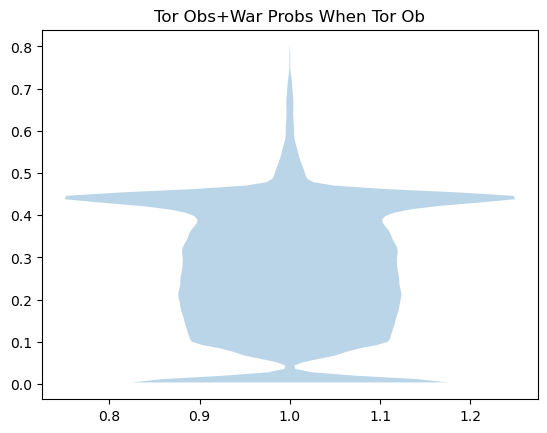

In [48]:
plt.violinplot(haz_probs_when_yes, showextrema = False)
plt.title('Tor Obs+War Probs When Tor Ob')

Text(0.5, 1.0, 'Tor Obs Probs When Tor Ob')

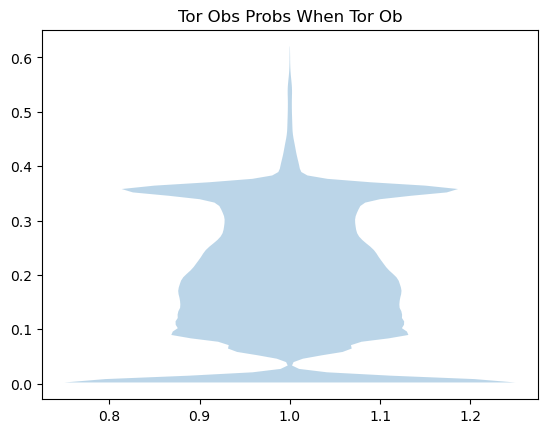

In [50]:
plt.violinplot(haz_probs_when_yes, showextrema = False)
plt.title('Tor Obs Probs When Tor Ob')

Text(0.5, 1.0, 'Hail Obs+War Probs When Tor Ob')

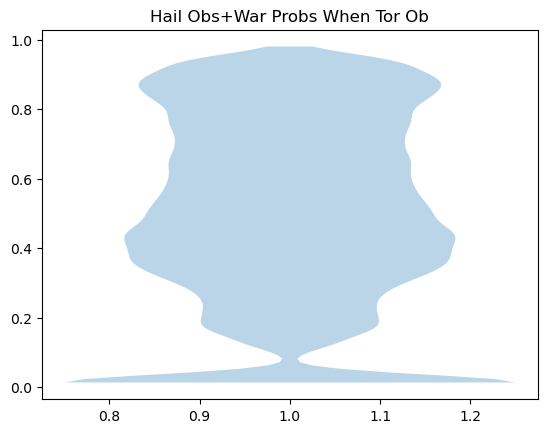

In [44]:
plt.violinplot(haz_probs_when_yes, showextrema = False)
plt.title('Hail Obs+War Probs When Tor Ob')

Text(0.5, 1.0, 'Hail Obs Probs When Tor Ob')

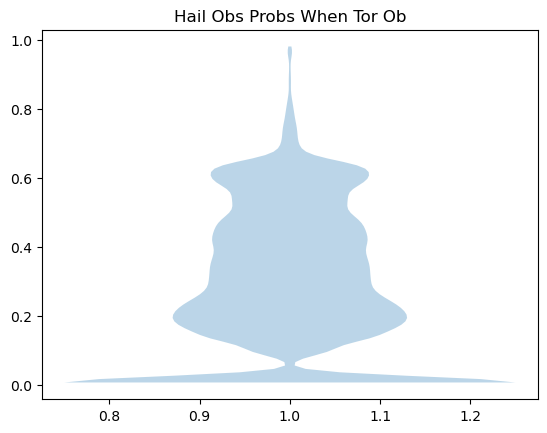

In [40]:
plt.violinplot(haz_probs_when_yes, showextrema = False)
plt.title('Hail Obs Probs When Tor Ob')

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f2e7f750e80>]}

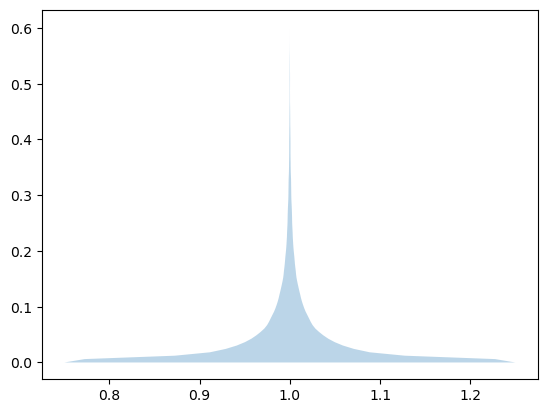

In [36]:
plt.violinplot(haz_probs_when_yes, showextrema = False)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f2e7f876500>]}

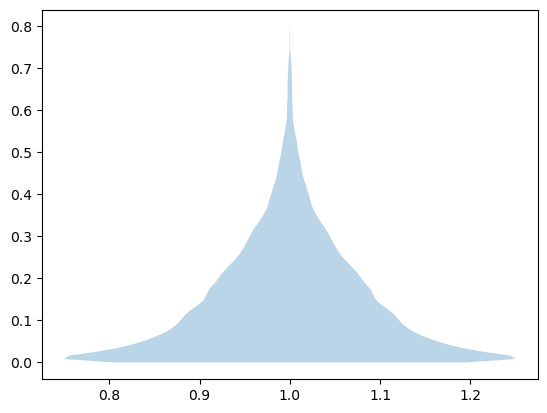

In [32]:
plt.violinplot(haz_probs_when_yes, showextrema = False)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f2e41c598a0>]}

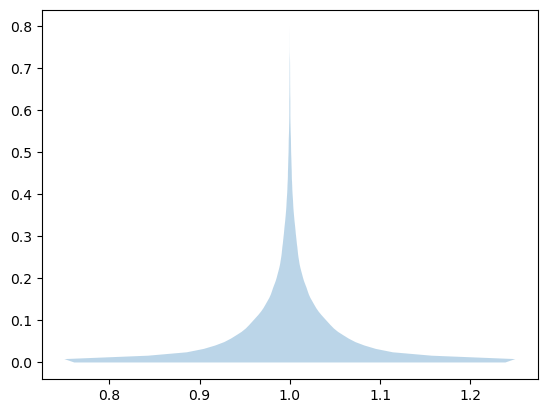

In [30]:
plt.violinplot(haz_probs_when_yes, showextrema = False)

{'bodies': [<matplotlib.collections.PolyCollection at 0x7f2e7fb33b80>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7f2e7fb32b60>,
 'cmins': <matplotlib.collections.LineCollection at 0x7f3368358100>,
 'cbars': <matplotlib.collections.LineCollection at 0x7f3368358430>}

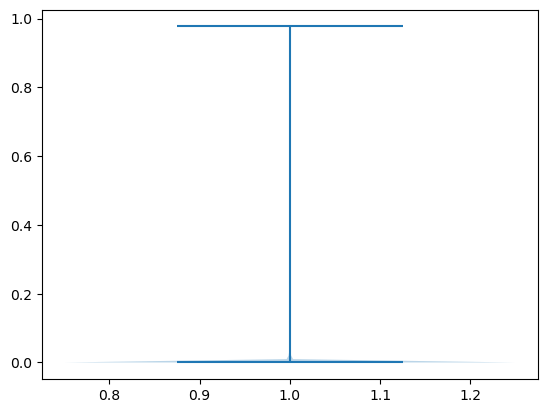

In [21]:
plt.violinplot(haz_probs_when_no)